## hello


In [23]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib notebook

<function matplotlib.pyplot.show>

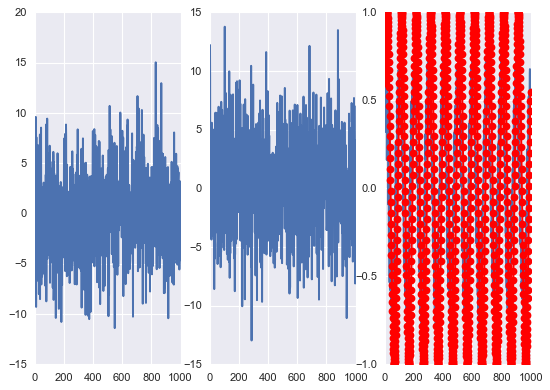

<Figure size 0x80 with 0 Axes>

In [42]:
# signal params
dur, f0, Fs = 1, 10,1000
Ts = 1.0/Fs
t = np.arange(0,dur,Ts,dtype =None)
t = t.reshape(len(t),1)
mu, sigma = 0, 4
# make signal/noise
s = []
n = []
samples = 1500
for i in range(samples):
    temp1 = np.sin(2*pi*f0*t+pi*np.random.rand(1,1))
    temp2 = np.random.normal(mu, sigma, (len(t),1))
    s.append(temp1)
    n.append(temp2)
s = np.asarray(s)
n = np.asarray(n)
s = np.squeeze(s, axis=2)
n = np.squeeze(n, axis=2)
# x: instances of several observations (nsamples,ndims)
x = s+n 

# visualize signal
fig, ax = plt.subplots(1,3)

fig=plt.figure(figsize=(0, 1), dpi= 80, facecolor='w', edgecolor='k')
# plt.rcParams['figure.figsize'] = [10, 5]
ax[0].plot(x[0,:])
ax[1].plot(x[1,:])
ax[2].plot(np.sum(x,0)/x.shape[0])
ax[2].plot(s[0,:],'ro-')
plt.show






<function matplotlib.pyplot.show>

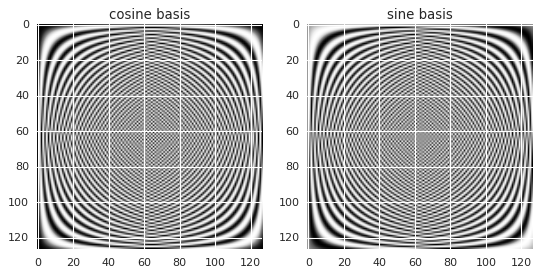

In [43]:
# visualize DFT basis
nfft = 128
temp_1 = np.arange(0,nfft-1)
temp_2 = np.arange(0,nfft-1)

temp_1 = temp_1.reshape((len(temp_1),1))  
temp_2 = temp_2.reshape((len(temp_2),1))  

F = np.matmul(temp_1,temp_2.T)
G = np.exp(-1j*2*pi*F/nfft)

fig, ax = plt.subplots(1,2)

ax[0].imshow(np.real(G))
ax[1].imshow(np.imag(G))
ax[0].set_title("cosine basis")
ax[1].set_title("sine basis")
plt.style.use('classic')
plt.show

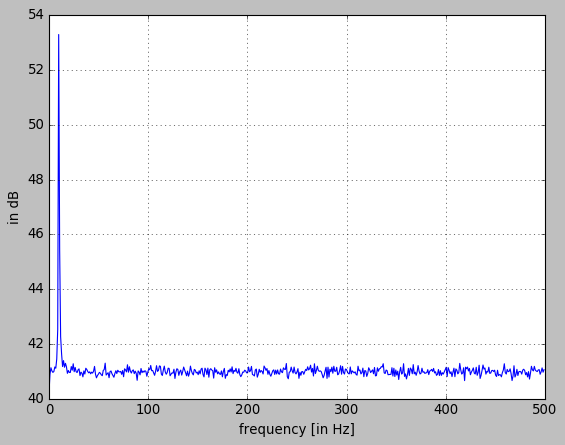

In [44]:
# basic DFT analysis
def nextpow2(i):
    n = 1
    while n < i: n *= 2
    return n

nfft = nextpow2(Fs)
X = np.fft.fft(x,nfft)
faxis = np.arange(0,nfft/2,1)/nfft*Fs
avg_X = np.sum(np.abs(X),0)/X.shape[0]
plt.plot(faxis,20*np.log10(avg_X[0:len(faxis)]))
plt.ylabel('in dB')
plt.xlabel('frequency [in Hz]')
plt.grid(True)
# plt.style.use('classic')
# plt.axis([0, 500, 0, 50])
plt.show()

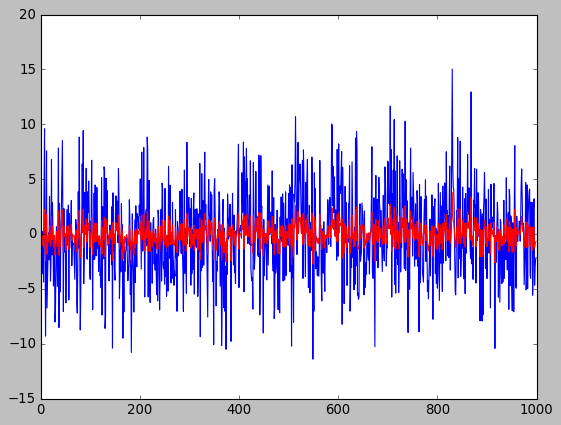

In [45]:
# PCA
# 1. standardize the data
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

plt.plot(x[0,:])
plt.plot(x_std[0,:],'r')


In [98]:
# 2. Calculate the covariance matrix
mu_x = np.mean(x_std,axis =0)
cov_x = (x_std-mu_x).T.dot((x_std-mu_x))/(x_std.shape[0]-1)
cov_x.shape

cov_mat = np.cov(x_std.T)
# 3 . Do the SVD on the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# all eigen vectors are unit norm
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

# collect eig values and eg vectors into tuples
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort the tuples from high to low based on eig val
eig_pairs.sort()
eig_pairs.reverse()

eig_vals_vec = []
eig_vecs_mat = []
for i in range(len(eig_pairs)):
    eig_vals_vec.append(np.asarray(eig_pairs[i][0]))
    eig_vecs_mat.append(eig_pairs[i][1])
eig_vals_vec = np.asarray(eig_vals_vec, dtype=np.float32)
eig_vecs_mat = np.asarray(eig_vecs_mat, dtype=np.float32)
#from sklearn.decomposition importPCA
#pca = PCA(n_components=500)
#pca.fit_transform(x)
#a = pca.explained_variance_
#plt.plot(a[0:10])

Everything ok!


<function matplotlib.pyplot.show>

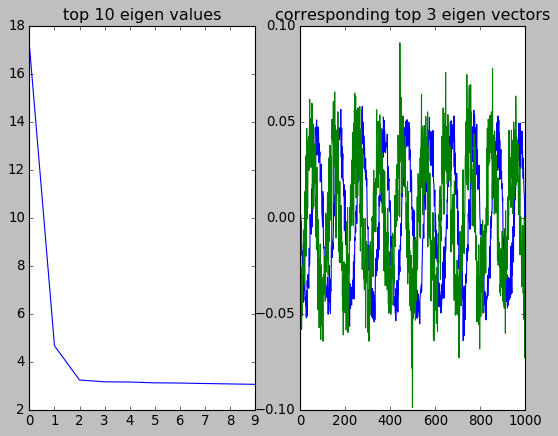

In [109]:
# visualize the top 10 eigen values
fig, ax = plt.subplots(1,2)

ax[0].plot(eig_vals_vec[0:10])
ax[1].plot(eig_vecs_mat[0:2,:].T)
ax[0].set_title("top 10 eigen values")
ax[1].set_title("corresponding top 2 eigen vectors")
plt.style.use('classic')
plt.show


In [118]:
# 3. Projection using the eigen vectors
y_hat = eig_vecs_mat[0:10,:].dot(x[0,:].T)

In [119]:
x_hat = eig_vecs_mat[0:10,:].T.dot(y_hat)

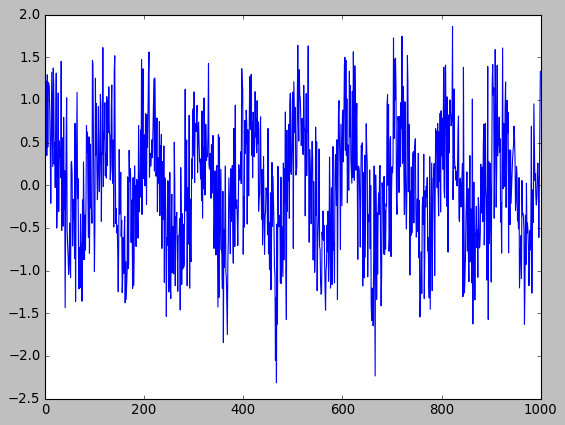

In [120]:
plt.plot(x_hat)